In [1]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [2]:
%pwd
%cd ir_data\GL-06-53-4

C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-06-53-4


### Load Raw Data

<AxesSubplot:xlabel='Relative Time'>

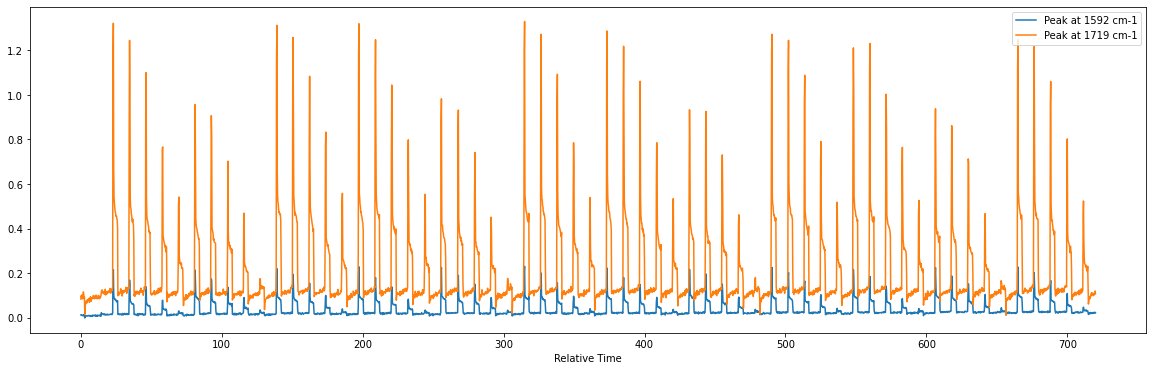

In [3]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [4]:
# List all the wavelengths observed
print([col for col in ir_data.columns if 'Peak' in col])

['Peak at 1592 cm-1', 'Peak at 1719 cm-1']


In [5]:
# Choose peak
peak_of_interest = 'Peak at 1592 cm-1'

In [7]:
# Correct Baseline (needed if using area data)
correction = Data.baseline_correction(ir_data[peak_of_interest], peak_of_interest)

ir_data[peak_of_interest] = ir_data[peak_of_interest] - correction

In [8]:
# Instantiate class
peaks = Peaks(ir_data)

# Auto find prominence and height to match number of conditions
prominence, no_reactions = peaks.auto_prom(peak_of_interest)
height = peaks.auto_height(peak_of_interest)
residence_time = peaks.auto_area(peak_of_interest, prominence, no_reactions, 10)

print('There are', no_reactions, 'reactions')
print('Prominence threshold =', np.round(prominence, 4))
print('Height threshold =', np.round(height, 4))
print('Residence time =', np.round(residence_time, 2))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encou

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encou

There are 12 reactions
Prominence threshold = 0.0164
Height threshold = 1.0
Residence time = 4.44


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


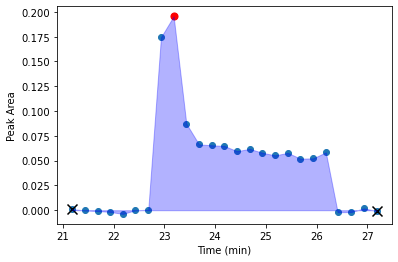

0


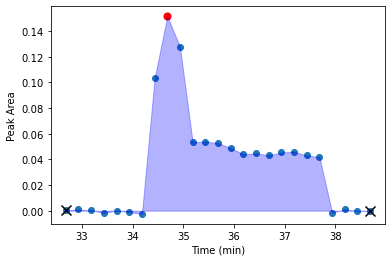

1


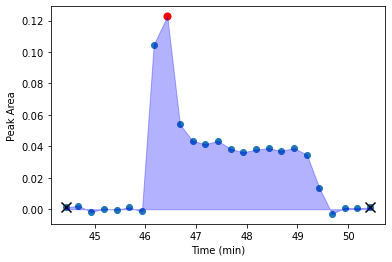

2


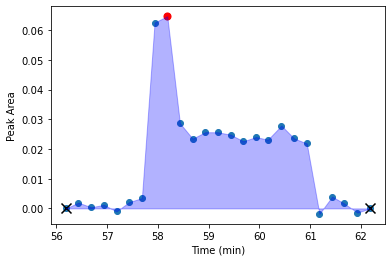

3


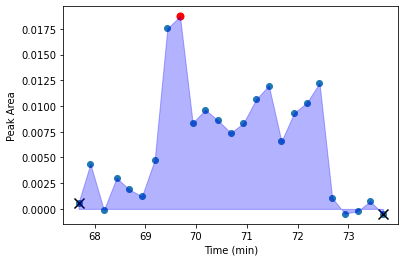

4


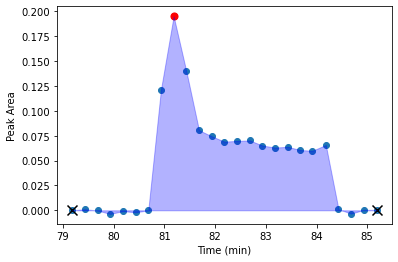

5


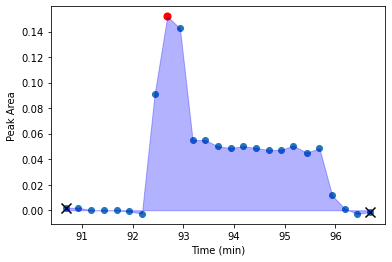

6


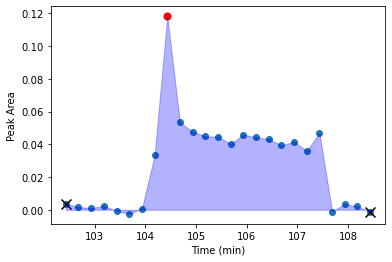

7


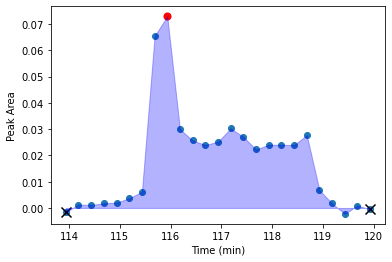

8


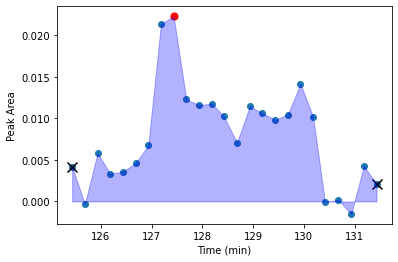

9


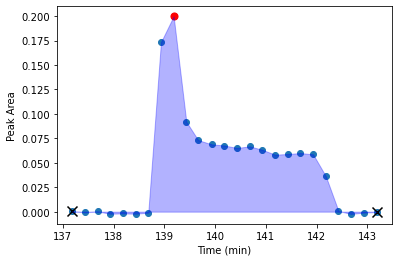

10


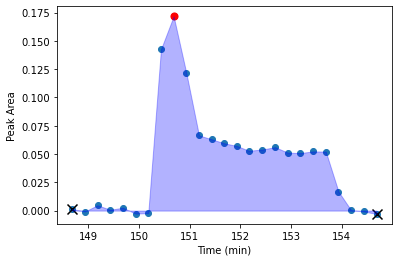

11


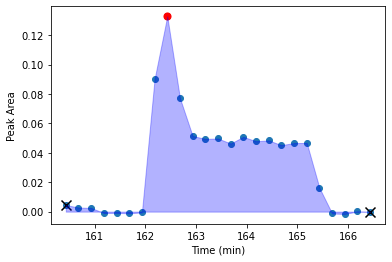

12


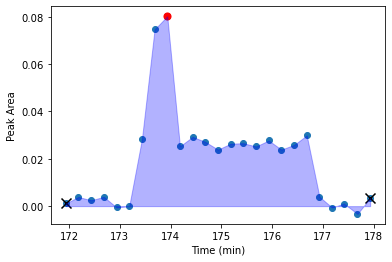

13


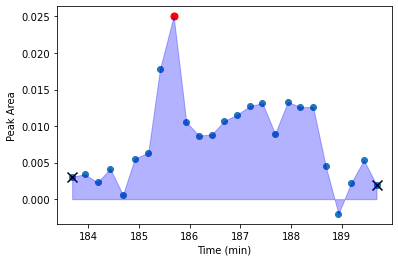

14


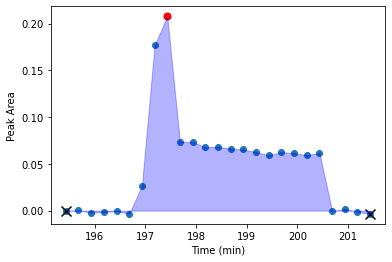

15


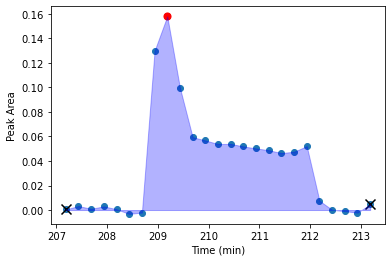

16


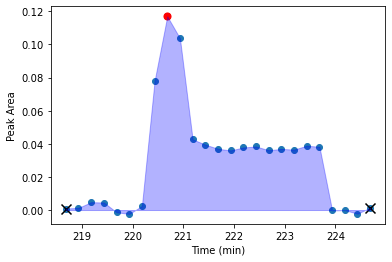

17


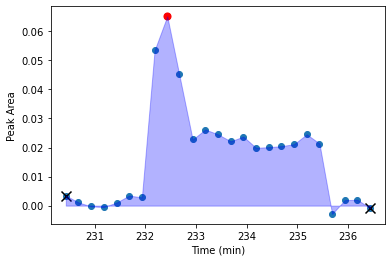

18


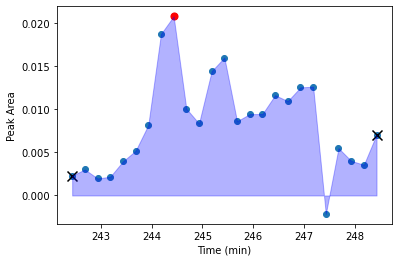

19


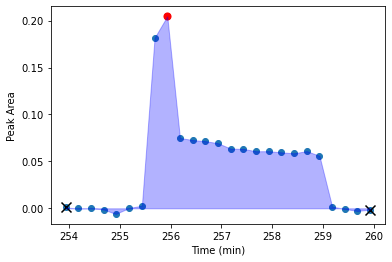

20


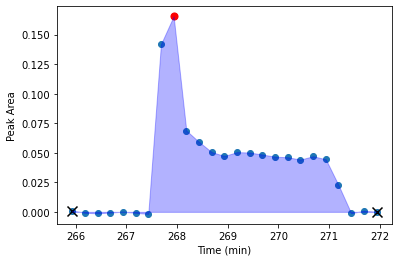

21


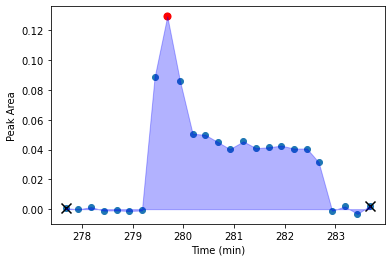

22


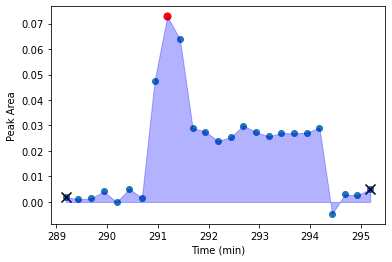

23


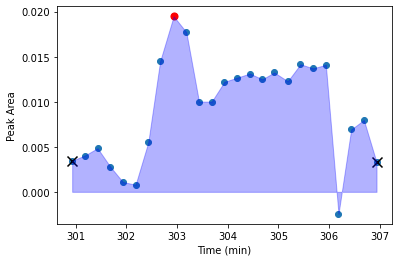

24


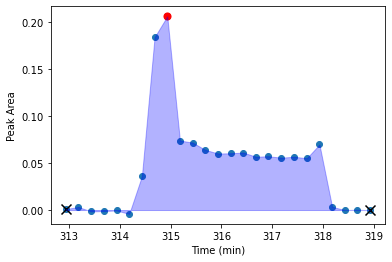

25


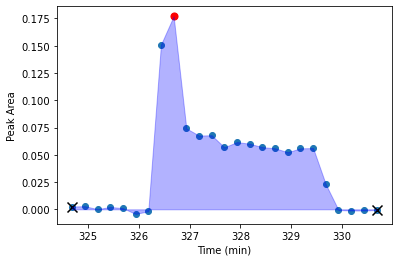

26


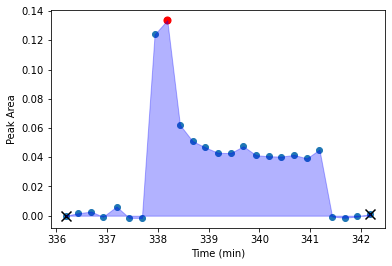

27


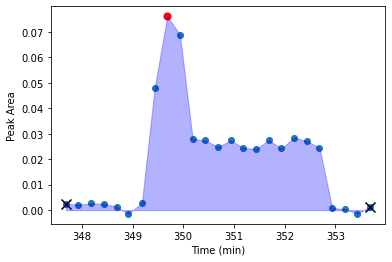

28


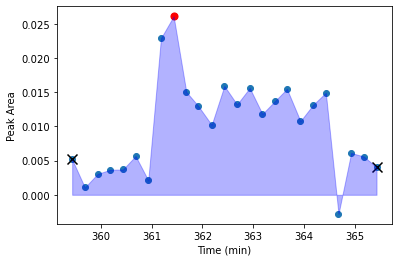

29


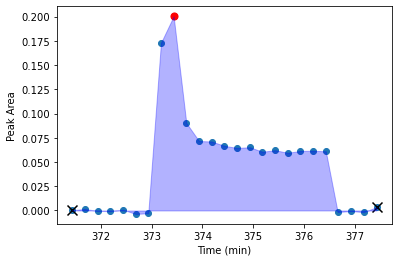

30


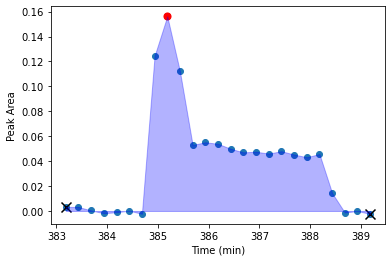

31


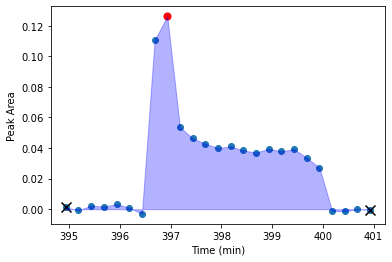

32


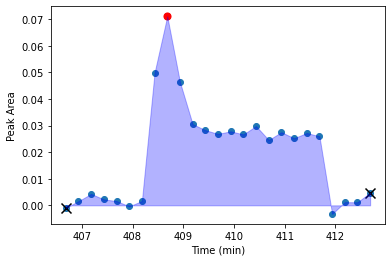

33


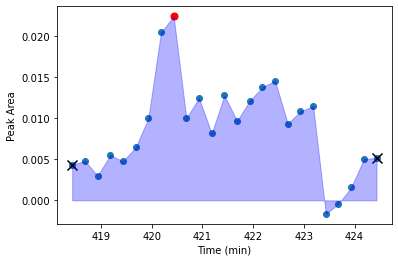

34


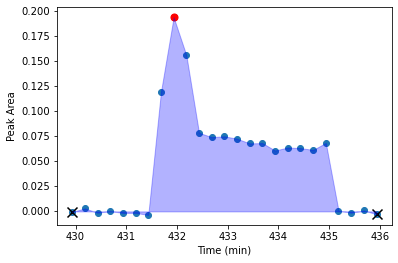

35


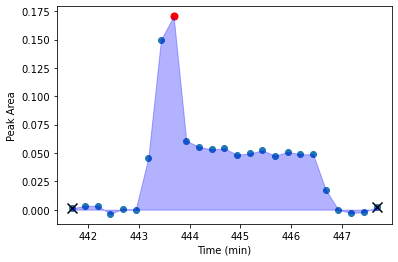

36


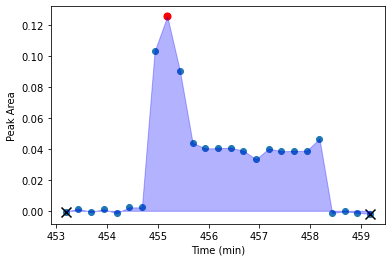

37


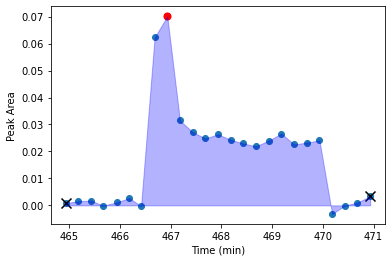

38


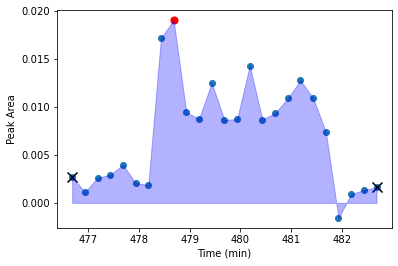

39


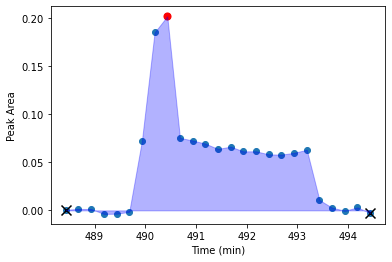

40


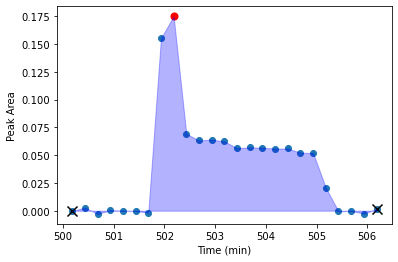

41


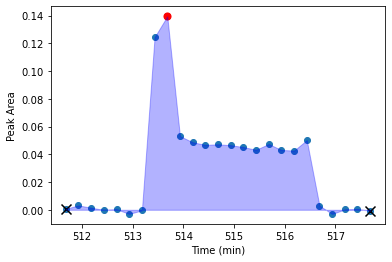

42


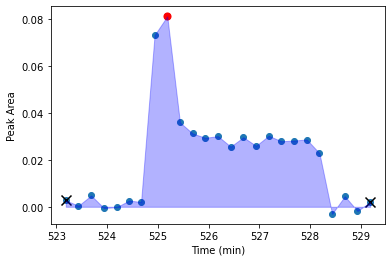

43


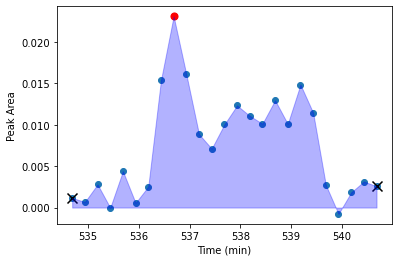

44


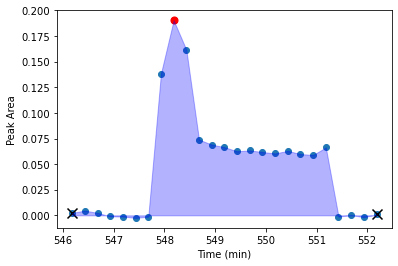

45


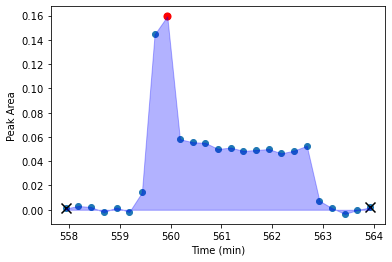

46


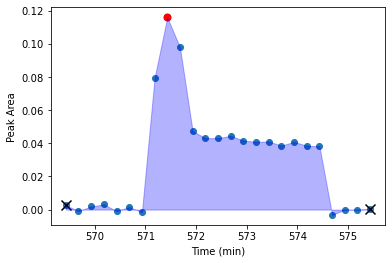

47


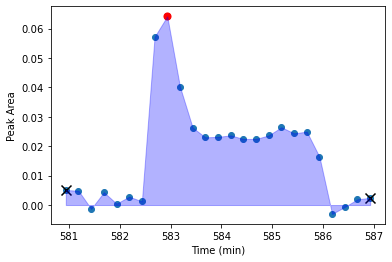

48


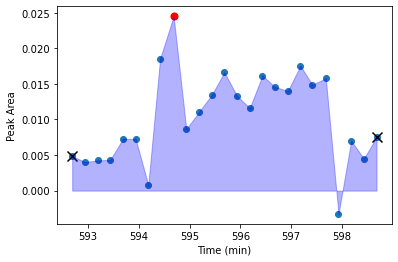

49


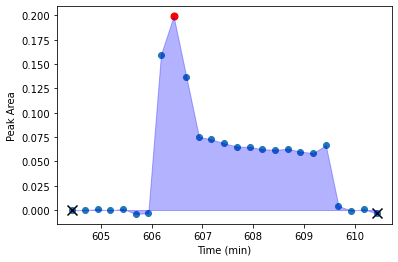

50


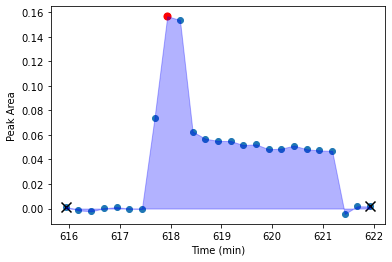

51


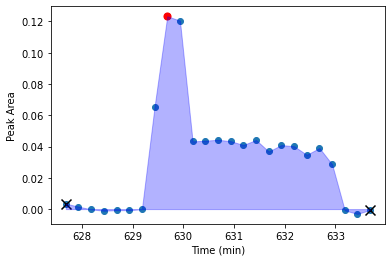

52


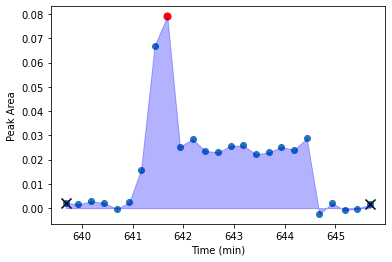

53


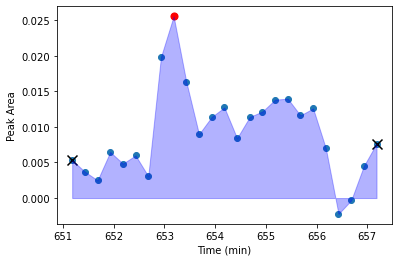

54


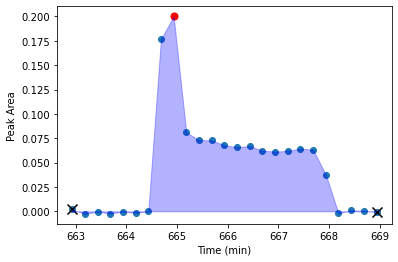

55


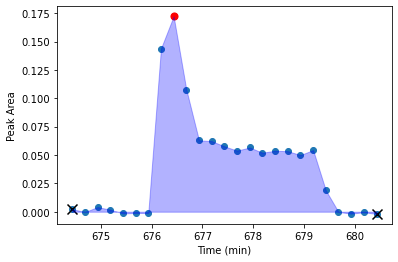

56


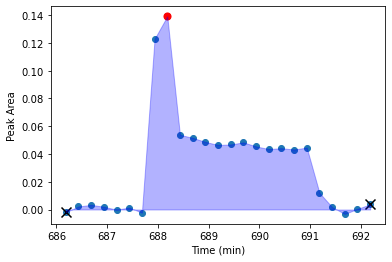

57


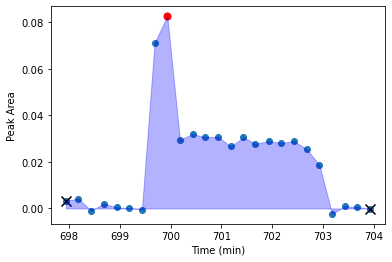

58


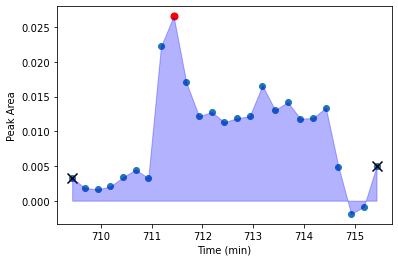

59


In [9]:
# For loop to see all experimental areas
ppreact = 5

for var in range(0,no_reactions * ppreact):
    peaks.exp_area_sp(prominence, residence_time, peak_of_interest, 0, 2, var)
    print(var)

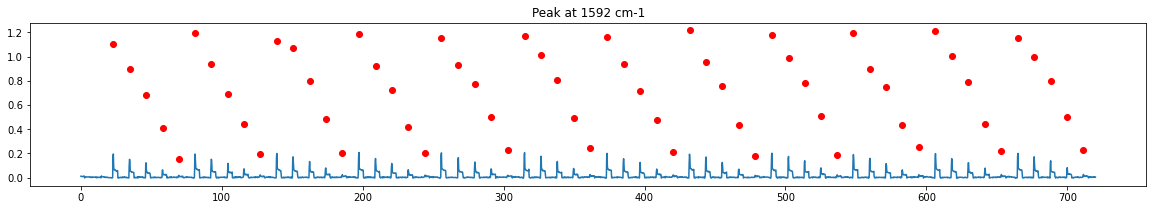

In [10]:
## PROMINENCE ALL WAVELENGTHS: Determine the peak prominences of every wavelength
#processed_ir_data = peaks.prominence_all(prominence)

## PROMINENCE: Determine the peak prominences of a single wavelength
#processed_ir_data = peaks.prominence(prominence, peak_of_interest)

## HEIGHT: # Determine the peak heights of a single wavelength
#processed_ir_data = peaks.height(height, peak_of_interest)

## EXP AREA: Determine the experimental areas of a single wavelength
processed_ir_data = peaks.exp_area(prominence, residence_time, peak_of_interest, 0, 2)

## FITTED AREA - SINGLE PEAK: Fit a gaussian to a single peak and determine it's area
#processed_ir_data= peaks.exp_area_sp(prominence, residence_time, peak_of_interest, -1, 3, 0)

## FITTED AREA: Determine the fitted areas of a single wavelength
#processed_ir_data = peaks.fitted_area(prominence, residence_time, peak_of_interest,0,3)

## Visualise which peaks have been picked - single peak
peaks.plot(processed_ir_data, peak_of_interest)

## Compare prominence, height, experimental area, and fitted area
#r2, compare = peaks.compare_no_height(prominence, residence_time, peak_of_interest, no_reactions, 10, 0, 3)
# NOTE: Areas seem to give the best value when the starting point is exactly on the peak (no baseline before)

#processed_ir_data
#r2

### Smooth the data

In [11]:
def linear_correction(processed_ir_data):

    rxn = processed_ir_data[['Relative Time','Peak Property']]

    # Find the number of spka points specified for each reaction
    quick_cond =pd.read_excel("Conditions.xlsx")
    spka_points = quick_cond['SPKA']
    
    # How many reactions are run
    no_reactions = len(spka_points)
    
    # Cycle over each reaction
    for var1 in range(0, no_reactions):
        points_per_reaction = spka_points[var1]

        df = []
        for var in range(0, no_reactions * points_per_reaction, points_per_reaction):
            # Find linear fit
            a,b = np.polyfit(rxn.iloc[1+var:points_per_reaction+var,0], rxn.iloc[1+var:points_per_reaction+var,:],1)
            # Create the smoothed y data
            best_fit_line = []
            best_fit_line = a[1] * rxn.iloc[1+var:points_per_reaction+var,0] + b[1]
            # Add the t0 in
            best_fit_line = pd.concat([pd.Series(rxn.iloc[var,1]),best_fit_line])
            # Append to list
            df.append(best_fit_line)

        linearised_data = pd.concat(df).reset_index(drop=True)

        # Save the raw data
        processed_ir_data['Raw Peak Property'] = processed_ir_data['Peak Property']
        # Overwrite raw data and add linear best fit to dataframe
        processed_ir_data['Peak Property'] = linearised_data

    return processed_ir_data

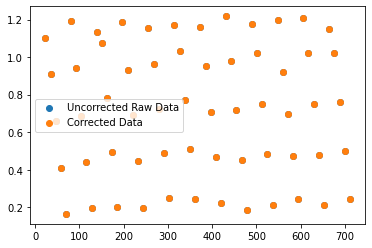

In [12]:
thing = linear_correction(processed_ir_data)
thing

plt.scatter(thing['Relative Time'], thing['Raw Peak Property'], label = 'Uncorrected Raw Data')
plt.scatter(thing['Relative Time'], thing['Peak Property'], label = 'Corrected Data')
plt.legend()
plt.show()

In [17]:
processed_ir_data

,Relative Time,Peak Property,Method,Raw Peak Property
0,23.183333,1.101567,experimental area,1.101567
1,34.683333,0.911385,experimental area,0.911385
2,46.433333,0.660479,experimental area,0.660479
3,58.183333,0.409572,experimental area,0.409572
4,69.683333,0.164004,experimental area,0.164004
5,81.183333,1.191891,experimental area,1.191891
6,92.683333,0.940957,experimental area,0.940957
7,104.433333,0.688712,experimental area,0.688712
8,115.933333,0.441834,experimental area,0.441834
9,127.433333,0.194956,experimental area,0.194956


In [13]:
no_reactions = 12
points_per_reaction = 5
rxn = processed_ir_data[['Relative Time','Peak Property']]

In [14]:
for var in range(0, no_reactions * points_per_reaction, points_per_reaction):
    print(var)

0
5
10
15
20
25
30
35
40
45
50
55


In [16]:
var = 0
rxn.iloc[1+var:points_per_reaction+var,0]

1    34.683333
2    46.433333
3    58.183333
4    69.683333
Name: Relative Time, dtype: float64

In [22]:
rxn = processed_ir_data[['Relative Time','Peak Property']]

# Find the number of spka points specified for each reaction
quick_cond =pd.read_excel("Conditions.xlsx")
spka_points = quick_cond['SPKA']

# How many reactions are run
no_reactions = len(spka_points)

9

In [35]:
for var in spka_points:
    


# Cycle over each reaction
#for var1 in range(0, no_reactions):
var1=0
points_per_reaction = spka_points[var1]

df=[]
var = 1
# Find linear fit
a,b = np.polyfit(rxn.iloc[1+var:points_per_reaction+var,0], rxn.iloc[1+var:points_per_reaction+var,:],1)
# Create the smoothed y data
best_fit_line = []
best_fit_line = a[1] * rxn.iloc[1+var:points_per_reaction+var,0] + b[1]
# Add the t0 in
best_fit_line = pd.concat([pd.Series(rxn.iloc[var,1]),best_fit_line])
# Append to list
df.append(best_fit_line)

df

[0     1.006720
 2     0.566412
 3     0.602309
 4     0.637426
 5     0.673324
 6     0.708441
 7     0.743558
 8     0.779455
 9     0.815352
 10    0.851249
 dtype: float64]

In [37]:
rxn

,Relative Time,Peak Property
0,11.183333,1.038298
1,22.183333,1.006720
2,33.683333,0.846383
3,45.183333,0.727006
4,56.433333,0.608607
5,67.933333,0.580211
6,79.183333,0.491348
7,90.433333,0.388673
8,101.933333,0.326445
9,113.433333,1.196599


In [ ]:

    linearised_data = pd.concat(df).reset_index(drop=True)

    # Save the raw data
    processed_ir_data['Raw Peak Property'] = processed_ir_data['Peak Property']
    # Overwrite raw data and add linear best fit to dataframe
    processed_ir_data['Peak Property'] = linearised_data

In [23]:
rxn.iloc[1:10,0]

1     22.183333
2     33.683333
3     45.183333
4     56.433333
5     67.933333
6     79.183333
7     90.433333
8    101.933333
9    113.433333
Name: Relative Time, dtype: float64

In [24]:
rxn

,Relative Time,Peak Property
0,11.183333,1.038298
1,22.183333,1.006720
2,33.683333,0.846383
3,45.183333,0.727006
4,56.433333,0.608607
5,67.933333,0.580211
6,79.183333,0.491348
7,90.433333,0.388673
8,101.933333,0.326445
9,113.433333,1.196599


In [ ]:
# Cycle over each reaction
for var1 in range(0, no_reactions):
    points_per_reaction = spka_points[var1]

    df = []
    for var in range(0, no_reactions * points_per_reaction, points_per_reaction):
        # Find linear fit
        a,b = np.polyfit(rxn.iloc[1+var:points_per_reaction+var,0], rxn.iloc[1+var:points_per_reaction+var,:],1)
        # Create the smoothed y data
        best_fit_line = []
        best_fit_line = a[1] * rxn.iloc[1+var:points_per_reaction+var,0] + b[1]
        # Add the t0 in
        best_fit_line = pd.concat([pd.Series(rxn.iloc[var,1]),best_fit_line])
        # Append to list
        df.append(best_fit_line)

    linearised_data = pd.concat(df).reset_index(drop=True)

    # Save the raw data
    processed_ir_data['Raw Peak Property'] = processed_ir_data['Peak Property']
    # Overwrite raw data and add linear best fit to dataframe
    processed_ir_data['Peak Property'] = linearised_data

In [18]:
processed_ir_data = linear_correction(processed_ir_data)

TypeError: expected non-empty vector for x

# Read experimental conditions and add to dataframe

In [44]:
Conditions()
experimental_data = Conditions.read(processed_ir_data)
#experimental_data

Inputs seem good: IR Datapoints =  55 , Number of conditions =  55


### Create the SPKA profiles

In [45]:
spka = SPKA(experimental_data)

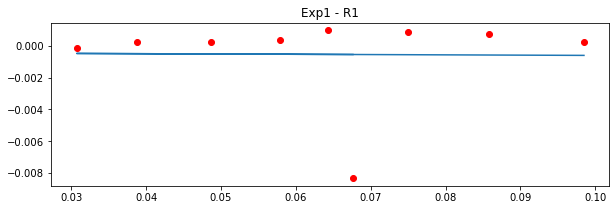

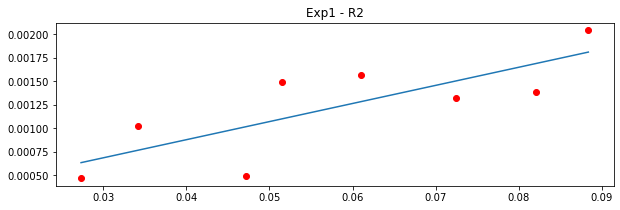

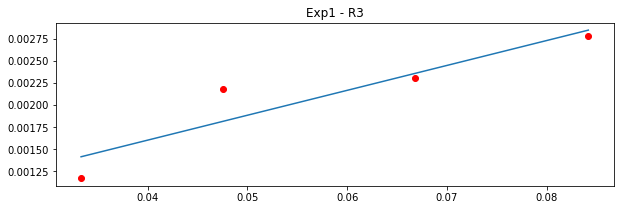

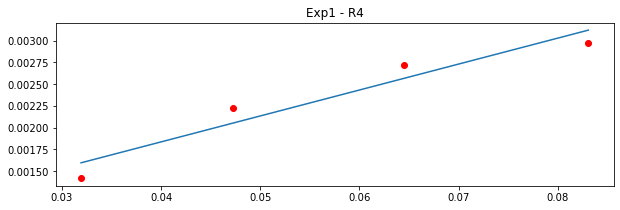

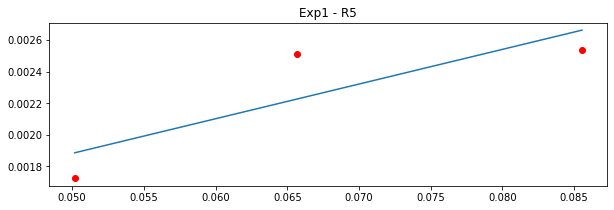

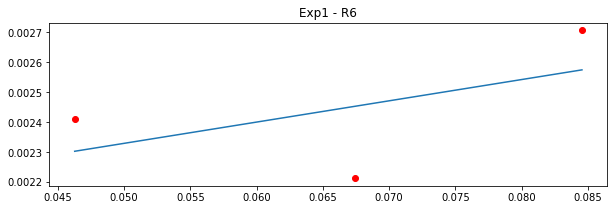

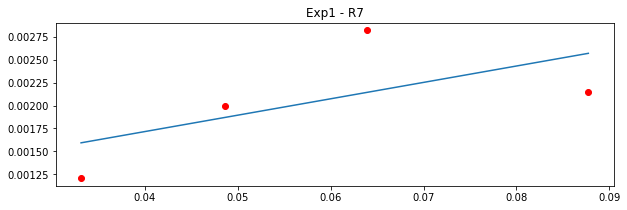

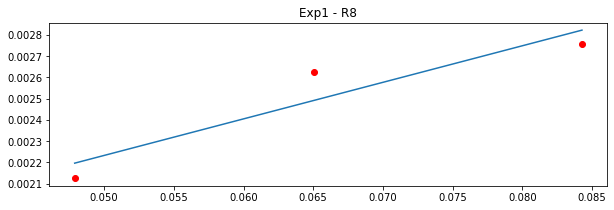

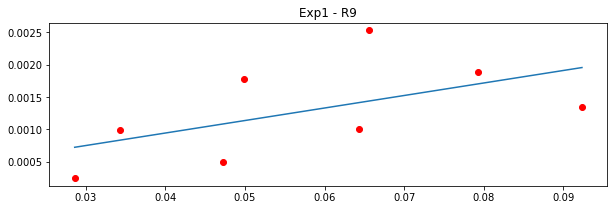

In [46]:
spka_data = spka.spka('[A]0')
#spka_data
spka.plot(spka_data)

## To Compare - must use Conditions.read(compare)
#r2 = spka.compare('[A]0')
#r2

### Perform RPKA

In [23]:
rpka = RPKA(spka_data)

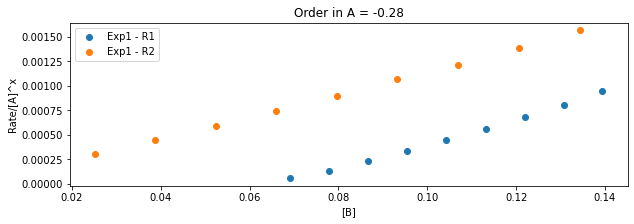

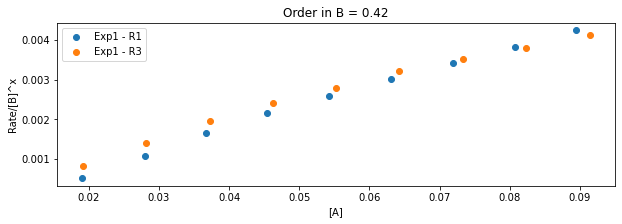

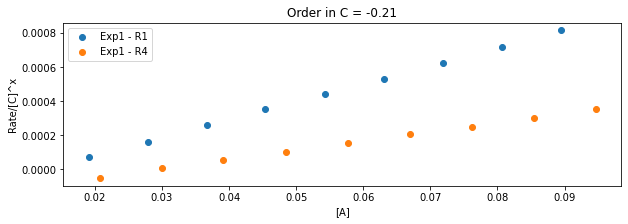

In [24]:
rpka_data = rpka.diff_excess()
#rpka_data

In [15]:
# Set up excelwriter
writer = pd.ExcelWriter('GL-06-50 - Processed - ' +
                        peak_of_interest[8:12] + ' - ' + # Adds Peak
                        processed_ir_data['Method'][0] + # Adds the methods used (prominence, area, etc)
                        '- Extended Int - Baseline - Linear Smooth.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
#rpka_data.to_excel(writer, sheet_name='RPKA Data', startrow=0 , startcol=0, index=False)
#spka_data.to_excel(writer, sheet_name='SPKA Data', startrow=0 , startcol=0, index=False)
#ir_data.to_excel(writer, sheet_name='IR Data', startrow=0 , startcol=0, index=False)
processed_ir_data.to_excel(writer, sheet_name='Processed IR', startrow=0 , startcol=0, index=False)
experimental_data.to_excel(writer, sheet_name='Experimental Data', startrow=0 , startcol=0, index=False)
#conditions.to_excel(writer, sheet_name='Conditions', startrow=0 , startcol=0, index=False)

# Save
writer.save()

# This won't work if the excel file is open